# Tangente

La **tangente** à une courbe en un de ses points est une droite qui « touche » la courbe au plus près au voisinage de ce point. La courbe et sa tangente forment alors un angle nul en ce point.


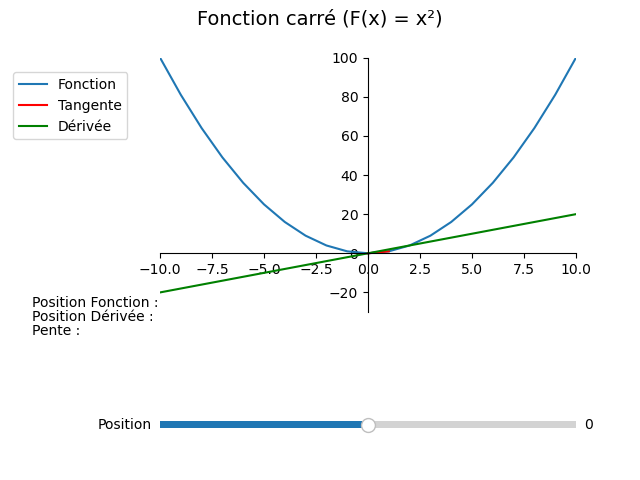

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Créer la figure et les axes
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.35)
ax.set_xlim(-10, 10)
ax.set_ylim(-30, 100)

# Coefficient initial pour a
a_init = 1

# Créer la fonction carré et le tracé initial
x = range(-10, 11)
y = [xi**2 for xi in x]
line, = ax.plot(x, y, label='Fonction')

# Calculer la dérivée de la fonction carré
dydx = [2*xi for xi in x]

# Créer la ligne pour la tangente
line_tangent, = ax.plot([0, 1], [0, 1], label='Tangente', color='red')

# Créer le tracé de la dérivée de la fonction carré
line_deriv, = ax.plot(x, dydx, label='Dérivée', color='green')

# Créer le curseur pour la position sur la courbe
ax_pos = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_pos = Slider(ax_pos, 'Position', -10, 10, valinit=0)

# Créer des zones de texte pour afficher les coordonnées et la pente
ax_legend = fig.add_axes([0.05, 0.2, 0.2, 0.1])
ax_legend.axis('off')
text_pos_func = ax_legend.text(0, 0.6, 'Position Fonction :\n\n\n')
text_pos_deriv = ax_legend.text(0, 0.3, 'Position Dérivée :\n\n\n')

text_slope = ax_legend.text(0, 0.0, 'Pente :\n\n\n')

# Fonction pour mettre à jour la tangente et les informations affichées
def update(val):
    pos = slider_pos.val
    x_pos = pos
    y_pos = x_pos**2
    slope = 2*x_pos
    x_tangent = [x_pos-5, x_pos+5]
    y_tangent = [slope*(x-x_pos) + y_pos for x in x_tangent]
    line_tangent.set_xdata(x_tangent)
    line_tangent.set_ydata(y_tangent)
    text_pos_func.set_text(f'Position Fonction : ({x_pos:.2f}, {y_pos:.2f})')
    text_pos_deriv.set_text(f'Position Dérivée : ({x_pos:.2f}, {slope:.2f})')
    text_slope.set_text(f'Pente : {slope:.2f}')
    
    # Mettre à jour le titre et la légende
    fig.suptitle(f'Fonction carré (F(x) = x²)', fontsize=14)
    fig.canvas.draw_idle()

# Régler les bords des axes pour se croiser en zéro
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


# Créer un nouvel axe à gauche du graphique pour la légende
ax_legend = fig.add_axes([0.05, 0.68, 0.12, 0.2])
ax_legend.axis('off')
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=10)


# Lier le curseur à la fonction de mise à jour
slider_pos.on_changed(update)

# Mettre un titre à la figure
fig.suptitle(f'Fonction carré (F(x) = x²)', fontsize=14)

# Afficher la figure
plt.show()

Il y a un lien étroit comme on peut le constater sur la figure entre la pente de la tengente et la varriation de la fonction (c'est à dire, sa dérivée).

## Droite Sécante

Une droite est sécante à un autre objet géométrique lorsqu'elle « coupe » cet autre objet. 

Soit _A_ et _B_ deux points de la courbe représentative $f$ d'abscisses respectives $a$ et $b$. La pente (ou le coefficient directeur) de la droite (AB) est égal à :

\begin{equation}
\frac{f(b)-f(a)}{b-a}
\end{equation}

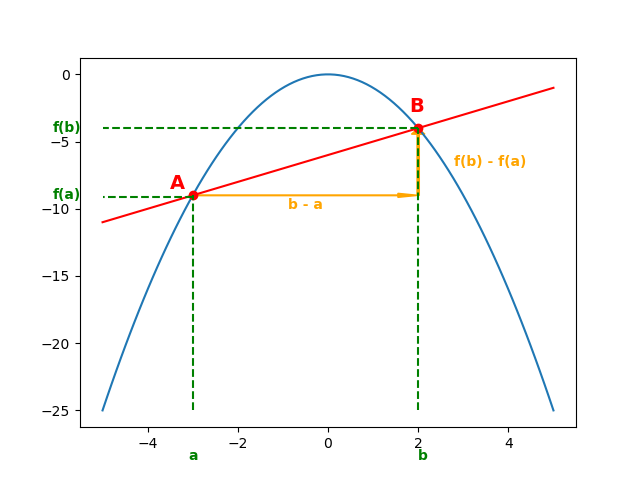

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Définition de la fonction parabolique
def f(x):
    return -x**2

# Génération des données pour la courbe
x = np.linspace(-5, 5, 100)
y = f(x)

# Définition de la droite sécante
a = -3
b = 3
m = (f(b) - f(a)) / (b - a)
p = f(a) - m*a
y_sec = m*x + p

# Calcul des points d'intersection de la droite avec la parabole
if m != 0:
    x_int = -p/m
    y_int = f(x_int)
else:
    x_int = a
    y_int = f(a)

# Coordonnées du deuxième point B
x_int_b = 2
m_b = (f(x_int_b) - f(x_int)) / (x_int_b - x_int)
if m_b != 0:
    p_b = f(x_int) - m_b*x_int
    y_int_b = m_b*x_int_b + p_b
else:
    y_int_b = f(x_int_b)

# Nouvelle droite entre A et B
m_new = (y_int_b - y_int) / (x_int_b - x_int)
p_new = y_int - m_new*x_int
y_sec_new = m_new*x + p_new

# Coordonnées du milieu entre A et B
x_mid = (x_int + x_int_b) / 2
y_mid = (y_int + y_int_b) / 2

# Création du graphique
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot([x_int, x_int_b], [y_int, y_int_b], 'ro')
ax.plot(x, y_sec_new, 'r-', label='Droite entre A et B')
ax.annotate('A', xy=(x_int, y_int), xytext=(-3.5, -8.5), color='r', fontsize=14, fontweight='bold')
ax.annotate('B', xy=(x_int_b, y_int_b), xytext=(1.8, -2.8), color='r', fontsize=14, fontweight='bold')
ax.plot([x_int, x_int], [-25, f(x_int)], linestyle='--', color='g')
ax.plot([x_int_b, x_int_b], [-25, f(x_int_b)], linestyle='--', color='g')
ax.arrow(x_int, y_int, x_int_b - x_int, 0, color='orange', width=0.05, head_width=0.3, length_includes_head=True)
ax.arrow(x_int_b, y_int, 0, y_int_b - y_int, color='orange', width=0.05, head_width=0.3, length_includes_head=True)
ax.text((x_int + x_int_b)/2, y_int - 0.2, 'b - a', ha='center', va='top', color='orange', fontweight='bold')

ax.plot([-3, -5], [-9.1, -9.1], linestyle='--', color='g')
ax.plot([2, -5], [-4, -4], linestyle='--', color='g')


ax.text(x_int_b + 0.8, (y_int + y_int_b)/2, 'f(b) - f(a)', ha='left', va='center', color='orange', fontweight='bold')
ax.text(x_int_b - 8.1, -9, 'f(a)', ha='left', va='center', color='green', fontweight='bold')
ax.text(x_int_b - 8.1, -4, 'f(b)', ha='left', va='center', color='green', fontweight='bold')

ax.text(-3.1, -28.4, 'a', ha='left', va='center', color='green', fontweight='bold')
ax.text(2, -28.4, 'b', ha='left', va='center', color='green', fontweight='bold')


plt.show()

## Tangente

La pente de la tengente est égale à $\frac{f(a+h)-f(a)}{h}$ lorsque $h$ se rapproche de 0.

On dit que la fonction $f$ est **dérivable** en $a$ s'il existe un nombre réel _L_, tel que :

\begin{equation}
\lim\limits_{h \rightarrow 0}\frac{f(a+h)-f(a)}{h} = L.
\end{equation}

_(On lit cette équation "La limite lorsque _h_ tend vers 0")_.

L est appelé le **nombre dérivé** de $f$ en $a$ et se note $f'(a)$.

La **tangente** à la courbe $C_f$ au point _A_ est la droite passante par _A_ de pente le nombre dérivé $f'(a)$.

Une équation de la tangente à la courbe $C_f$ en A est :

\begin{equation}
y = f'(a)(x - a) + f(a)
\end{equation}

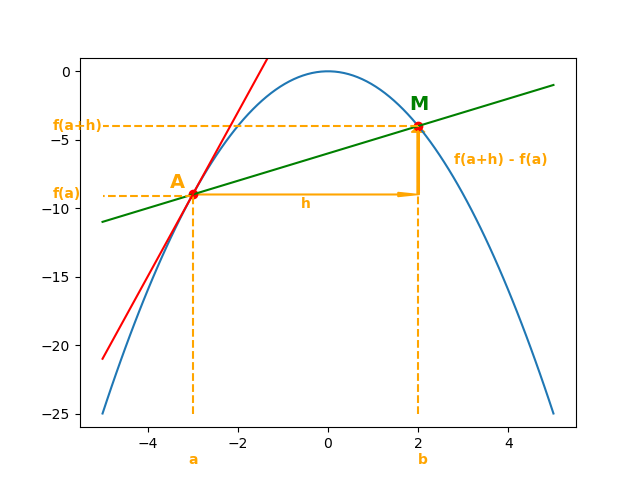

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# Définition de la fonction parabolique
def f(x):
    return -x**2

# Génération des données pour la courbe
x = np.linspace(-5, 5, 100)
y = f(x)

# Définition de la droite sécante
a = -3
b = 3
m = (f(b) - f(a)) / (b - a)
p = f(a) - m*a
y_sec = m*x + p

# Calcul des points d'intersection de la droite avec la parabole
if m != 0:
    x_int = -p/m
    y_int = f(x_int)
else:
    x_int = a
    y_int = f(a)

# Coordonnées du deuxième point B
x_int_b = 2
m_b = (f(x_int_b) - f(x_int)) / (x_int_b - x_int)
if m_b != 0:
    p_b = f(x_int) - m_b*x_int
    y_int_b = m_b*x_int_b + p_b
else:
    y_int_b = f(x_int_b)

# Nouvelle droite entre A et B
m_new = (y_int_b - y_int) / (x_int_b - x_int)
p_new = y_int - m_new*x_int
y_sec_new = m_new*x + p_new

# Coordonnées du milieu entre A et B
x_mid = (x_int + x_int_b) / 2
y_mid = (y_int + y_int_b) / 2

# Création du graphique
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot([x_int, x_int_b], [y_int, y_int_b], 'ro')
ax.plot(x, y_sec_new, 'green', label='Droite entre A et B')
ax.annotate('A', xy=(x_int, y_int), xytext=(-3.5, -8.5), color='orange', fontsize=14, fontweight='bold')
ax.annotate('M', xy=(x_int_b, y_int_b), xytext=(1.8, -2.8), color='green', fontsize=14, fontweight='bold')
ax.plot([x_int, x_int], [-25, f(x_int)], linestyle='--', color='orange')
ax.plot([x_int_b, x_int_b], [-25, f(x_int_b)], linestyle='--', color='orange')
ax.arrow(x_int, y_int, x_int_b - x_int, 0, color='orange', width=0.05, head_width=0.3, length_includes_head=True)
ax.arrow(x_int_b, y_int, 0, y_int_b - y_int, color='orange', width=0.05, head_width=0.3, length_includes_head=True)
ax.text((x_int + x_int_b)/2, y_int - 0.2, 'h', ha='center', va='top', color='orange', fontweight='bold')

ax.plot([-3, -5], [-9.1, -9.1], linestyle='--', color='orange')
ax.plot([2, -5], [-4, -4], linestyle='--', color='orange')


ax.text(x_int_b + 0.8, (y_int + y_int_b)/2, 'f(a+h) - f(a)', ha='left', va='center', color='orange', fontweight='bold')
ax.text(x_int_b - 8.1, -9, 'f(a)', ha='left', va='center', color='orange', fontweight='bold')
ax.text(x_int_b - 8.1, -4, 'f(a+h)', ha='left', va='center', color='orange', fontweight='bold')

ax.text(-3.1, -28.4, 'a', ha='left', va='center', color='orange', fontweight='bold')
ax.text(2, -28.4, 'b', ha='left', va='center', color='orange', fontweight='bold')


ax.plot(x, 6*(x+3) - 9, 'red', label='Tangente au point A')
ax.set_ylim(-26, 1)

plt.show()

## Tangente à une courbe

On va ici essayer de trouver les variations de la fonction carré ; et de construire la relation entre nombre dérivé et variations de la fonction.

On va partir d'un exemple connu, la fonction carré. Elle est croissante pour tout les nombres positifs et décroissante pour tout les nombres négatifs.

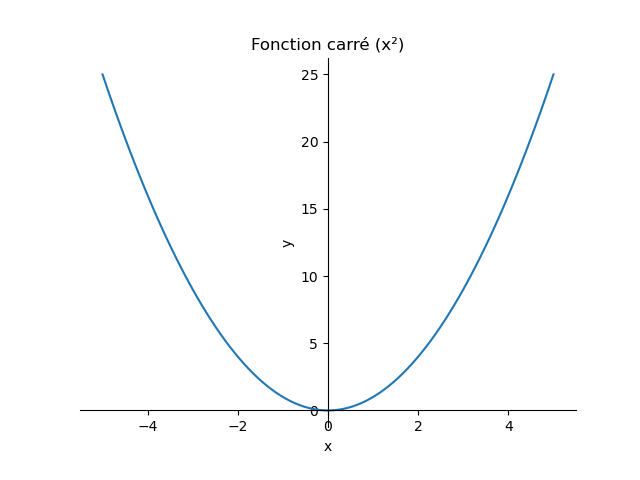

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Définition de la fonction
def lin(x):
    return x**2

# Génération des valeurs pour x et y
x = np.linspace(-5, 5, 100)
y = lin(x)

# Création du graphique
fig, ax = plt.subplots()

# Tracer la courbe
ax.plot(x, y)

# Centrer l'axe des ordonnées et des abscisses sur la courbe
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

# Afficher les points (a, f(a)) et (b, f(b)) pour a < b
a = -2
b = 2
fa = lin(a)
fb = lin(b)


# Ajout des labels et titre
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Fonction carré (x²)')

# Tracer les lignes pointillées

# Affichage du graphique
plt.show()


On va donc commencer par calculer la pente. Lorsqu'on l'aura bien simplifié, on pourra voir ce qu'il se passe lorsque h tend vers _0_.

- $\frac{f(a+h)+f(a)}{h} = \frac{(a+h)^2 - a^2}{h}$
- $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \frac{a^2 + 2ah + h^2 - a^2}{h}$
- $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \frac{2ah + h^2}{h}$
- $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \frac{2ah}{h} + \frac{h^2}{h}$
- $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = 2a + h$

On rappel que ce que l'on cherche, c'est la limite quand _h_ tend vers 0 :

- $\lim\limits_{h \rightarrow 0}\frac{f(a+h)-f(a)}{h} = \lim\limits_{h \rightarrow 0}2a + h = 2a$

On vient ici d'établir la limite de notre quotient lorsque _h_ tend vers 0, il est égal à $2a$, qui est également la pente de la tangente.

On peut conclure que si $a$ est positif, la pente est positive et la fonction est croissante ; et que si $a$ est négatif, la pente est négative et la fonction est décroissante.

On vient de prouver que :

- $f(x) = x^2$
- $f'(x) = 2x$

La fonction $f'(x)$ est la fonction dérivée de la fonction $f(x)$.